<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/TF2_0_LinearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf

In [2]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [3]:
# load  the data
data = load_breast_cancer()

In [4]:
# cheack the type of data
type(data)

sklearn.utils._bunch.Bunch

In [5]:
# note: it is a Bunch object
# this basically acts like a dictionary where you can treat the keys like attributes
data.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# data (attribute) means the input data
data.data.shape
# it has 569 samples, 30 features

(569, 30)

In [7]:
# targets
data.target
# note how the targets are just 0s and 1s
#normally, when you have k targets, they are labelled 0...k-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
# there are also 569 corresponding targets- legnth of x equals length of y
data.target.shape

(569,)

In [11]:
# you can also determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
# normally we would put all of our imports at the top
# but this lets us tell a story

from sklearn.model_selection import train_test_split

# split the data into train and test sets
# this lets us stimulate how our model will perform in the future

X_train, X_test ,  y_train, y_test = train_test_split(data.data,data.target, test_size=0.33)
N, D =X_train.shape

In [13]:
# Scale the data
# you ll learn why scaling is needed in a later course
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)


In [19]:
import tensorflow as tf

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, you can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))


Epoch 1/100
12/12 [==============================] - 1s 25ms/step - loss: 11.2056 - accuracy: 0.6929 - val_loss: 192.2759 - val_accuracy: 0.4149
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 9.4930 - accuracy: 0.7454 - val_loss: 198.7170 - val_accuracy: 0.4149
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 8.2675 - accuracy: 0.7612 - val_loss: 204.0184 - val_accuracy: 0.4149
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 7.4762 - accuracy: 0.7743 - val_loss: 209.7699 - val_accuracy: 0.4149
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 6.7937 - accuracy: 0.7795 - val_loss: 215.0827 - val_accuracy: 0.4149
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 6.2686 - accuracy: 0.7900 - val_loss: 219.9467 - val_accuracy: 0.4149
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 5.7500 - accuracy: 0.7953 - val_loss: 224.2123 - val_accuracy: 0.41

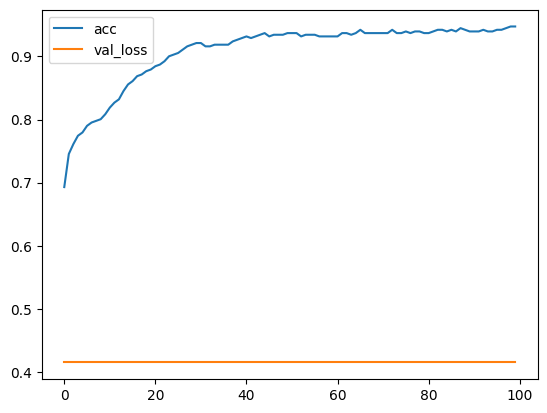

In [22]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_loss')
plt.legend()

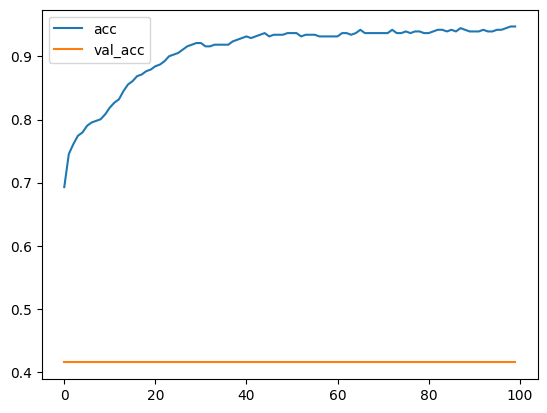

In [21]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()